In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scanpy as sc
import scIB

sc.settings.verbosity = 3 # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
import warnings
warnings.filterwarnings('ignore')

scanpy==1.4.4+40.gbd5f862 anndata==0.6.22.post1 umap==0.3.9 numpy==1.17.0 scipy==1.3.1 pandas==0.25.0 scikit-learn==0.21.3 statsmodels==0.10.1 python-igraph==0.7.1 louvain==0.6.1


In [2]:
plt.rcParams['figure.figsize'] = 8,8

In [3]:
adata_file = "/storage/groups/ml01/workspace/group.daniela/tm/facs/norm/Thymus_raw.h5ad"
adata = sc.read(adata_file, cache=True)

In [4]:
scIB.preprocessing.reduce_data(adata, hvg=True, batch_key='tissue', pca=True, umap=True)

HVG
filtered out 4566 genes that are detectedin less than 1 cells
extracting highly variable genes
    finished (0:00:02)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
Computed 4000 highly variable genes
PCA
computing PCA with n_comps = 50
computing PCA on highly variable genes
    finished (0:00:04)
Nearest Neigbours
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix (0:00:04)
UMAP
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:10)


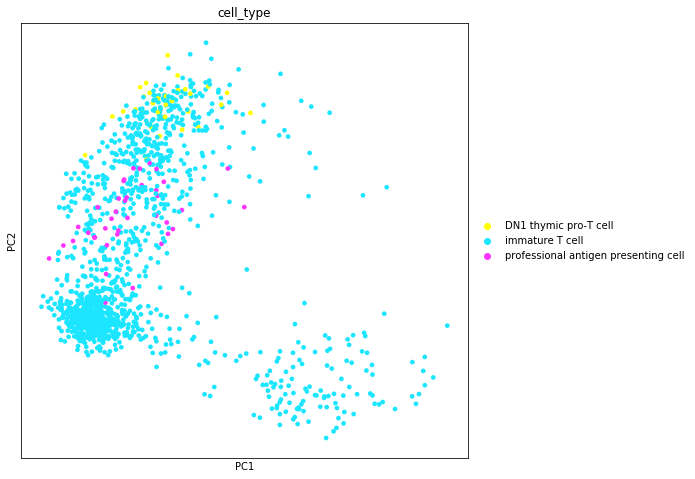

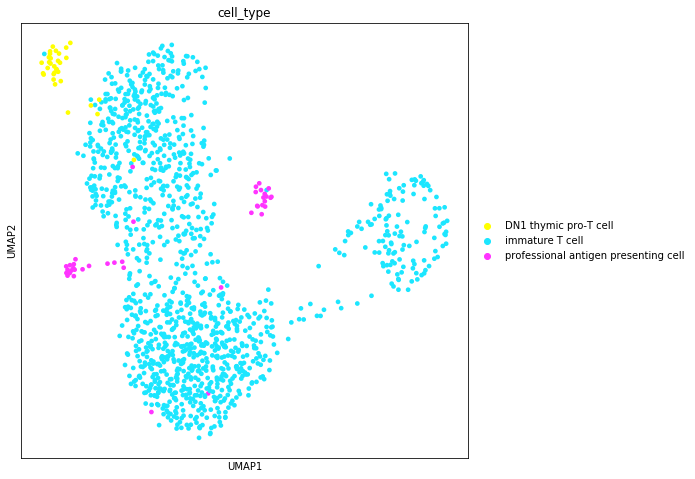

In [5]:
sc.pl.pca(adata, color=['cell_type'], palette=sc.pl.palettes.godsnot_64)
sc.pl.umap(adata, color=['cell_type'], palette=sc.pl.palettes.godsnot_64)

In [6]:
adata

AnnData object with n_obs × n_vars = 1349 × 18867 
    obs: 'tissue', 'sample', 'sex', 'cell_type', 'n_counts', 'log_counts', 'n_genes', 'percent_mito', 'size_factors'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'pca', 'neighbors', 'cell_type_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'

## Call Combat

In [7]:
adata_combat = adata.copy()

In [8]:
sc.pp.combat(adata_combat, key='sample', covariates=None, inplace=True)

Standardizing Data across genes.

Found 5 batches

Found 0 numerical variables:
	

Fitting L/S model and finding priors

Finding parametric adjustments

Adjusting data



In [9]:
# Check, if Combat makes any changes at all
(adata_combat.X != adata.X).sum()

25451583

In [10]:
scIB.preprocessing.reduce_data(adata_combat, hvg=True, batch_key='tissue', pca=True, umap=True)

HVG
extracting highly variable genes
    finished (0:00:06)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
Computed 4000 highly variable genes
PCA
computing PCA with n_comps = 50
computing PCA on highly variable genes
    finished (0:00:04)
Nearest Neigbours
computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix (0:00:00)
UMAP
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:07)


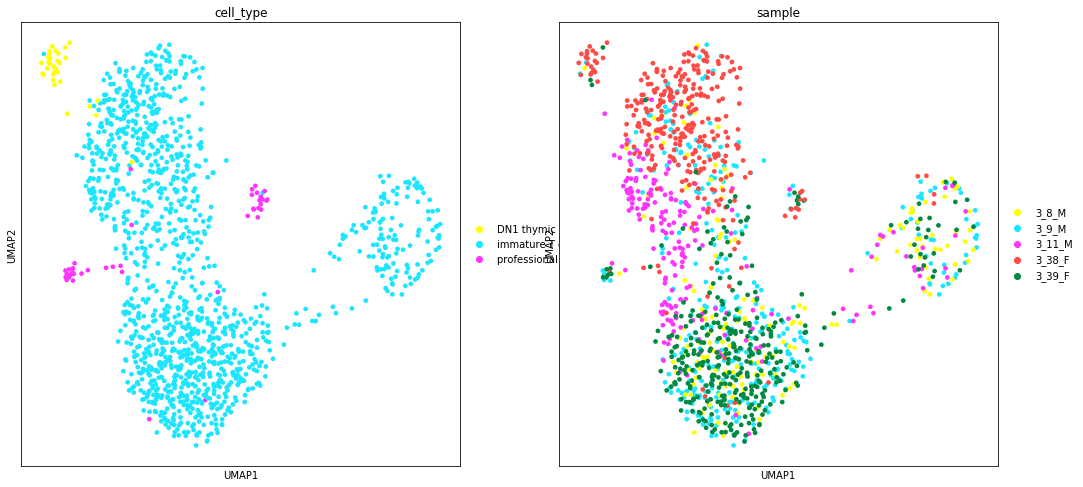

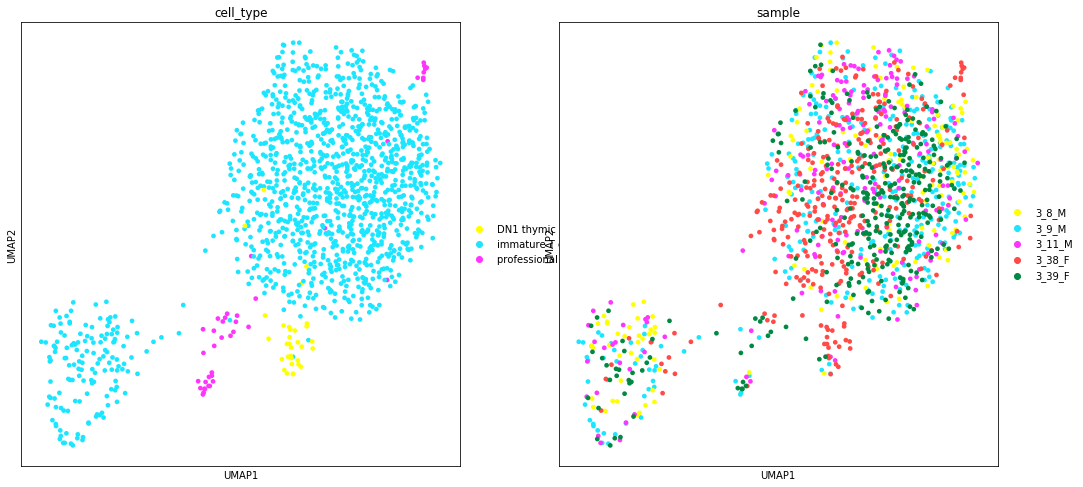

In [11]:
sc.pl.umap(adata, color=['cell_type', 'sample'], palette=sc.pl.palettes.godsnot_64)
sc.pl.umap(adata_combat, color=['cell_type', 'sample'], palette=sc.pl.palettes.godsnot_64)

In [13]:
scIB.metrics.kBET_comparison(adata, adata.X, adata_combat.X, covariate_key='sample', cluster_key='cell_type')

covariate: sample
cluster immature T cell
importing count matrix
kBET estimation
Initial neighbourhood size is set to 31.
reducing dimensions with svd first...
finding knns...done. Time:
   user  system elapsed 
  0.439   0.751   0.175 
Number of kBET tests is set to 64.
There are 45 cells (7.053%) that do not appear in any neighbourhood.
The expected frequencies for each category have been adapted.
Cell indexes are saved to result list.
importing count matrix
kBET estimation
Initial neighbourhood size is set to 31.
reducing dimensions with svd first...
finding knns...done. Time:
   user  system elapsed 
  0.300   0.519   0.139 
Number of kBET tests is set to 64.
There are 80 cells (12.539%) that do not appear in any neighbourhood.
The expected frequencies for each category have been adapted.
Cell indexes are saved to result list.
cluster DN1 thymic pro-T cell
importing count matrix
kBET estimation
Initial neighbourhood size is set to 1.
reducing dimensions with svd first...
finding kn

{'immature T cell': -0.012887813062351317,
 'DN1 thymic pro-T cell': 0.0,
 'professional antigen presenting cell': 0.0}